# Clase 27/10/20 - Video 15

# Guía Módulos de Filtrado en 3D Slicer

## Gradient Anisotropic Diffusion 
Este método permite reducir el ruido en una imagen preservando características específicas como los bordes. Se usa como preprocesamiento antes de una segmentación o un preprocesamiento antes de una renderización 

In [ ]:
cliModule = slicer.modules.gradientanisotropicdiffusion #Se accede al módulo
n = cliModule.cliModuleLogic().CreateNode()  # Con esta rutina se puede conocer que parámetros recibe el filtro
for groupIndex in range(n.GetNumberOfParameterGroups()):
    for parameterIndex in range(n.GetNumberOfParametersInGroup(groupIndex)):  
        print('Parameter ({0}/{1}): {2} ({3})'.format(groupIndex, parameterIndex, n.GetParameterName(groupIndex, parameterIndex), n.GetParameterLabel(groupIndex, parameterIndex)))

#parametros para la operacion de registro
parameters = {} #Se crea el diccionario de parámetros
parameters['conductance'] = 1.0 # A mayor valor, menos se preservan los bordes
parameters['numberOfIterations'] = 10 #A mayor iteraciones, mayor suavizado
parameters['timeStep'] = 0.05
volumen_entrada = slicer.mrmlScene.GetNodeByID('vtkMRMLScalarVolumeNode1') #Se define el volumen de entrada
volumen_salida = slicer.vtkMRMLScalarVolumeNode()  #Se define el volumen de salida (se crea un volumen nuevo) 
slicer.mrmlScene.AddNode(volumen_salida)  #Se añade la salida al nodo
parameters['inputVolume'] = volumen_entrada.GetID() # Se asigna el volumen de entrada 
parameters['outputVolume'] = volumen_salida.GetID() # Se asigna el volumen de salida
cliModule = slicer.modules.gradientanisotropicdiffusion
cliNode = slicer.cli.run(cliModule,None,parameters,wait_for_completion=True) #Se corre el modulo con los parámetros establecidos

## Gaussian Blur Image Filter
Es el resultado de desenfocar una imagen mediante una función gaussiana, se hace la convolución entre una imagen y un kernel gaussiano en el que el gaussiano tiene una desviación estándar especificada por el usuario ("sigma"). Generalmente se usa para reducir el ruido de la imagen y reducir los detalles.

In [ ]:
cliModule=slicer.modules.gaussianblurimagefilter
n = cliModule.cliModuleLogic().CreateNode()
for groupIndex in range(n.GetNumberOfParameterGroups()):
    for parameterIndex in range(n.GetNumberOfParametersInGroup(groupIndex)):  
        print('Parameter ({0}/{1}): {2} ({3})'.format(groupIndex, parameterIndex, n.GetParameterName(groupIndex, parameterIndex), n.GetParameterLabel(groupIndex, parameterIndex)))
volumen_entrada = slicer.mrmlScene.GetNodeByID('vtkMRMLScalarVolumeNode1')
volumen_salida = slicer.vtkMRMLScalarVolumeNode()
slicer.mrmlScene.AddNode(volumen_salida)
parameters = {}
parameters['inputVolume'] = volumen_entrada.GetID()
parameters['outputVolume'] = volumen_salida.GetID()
parameters['sigma']=10 #Se define el sigma (desviación estándar de la gaussiana)
cliModule=slicer.modules.gaussianblurimagefilter
cliNode = slicer.cli.run(cliModule,None,parameters,wait_for_completion=True)

## Median Image Filter

MedianImageFilter se usa comúnmente como un enfoque sólido para la reducción de ruido. Este filtro es particularmente eficaz contra el ruido de "salt and peper". En otras palabras, es resistente a la presencia de valores atípicos de nivel de gris. Este filtro calcula el valor de cada píxel de salida como la mediana estadística de la vecindad de valores alrededor del píxel.

In [ ]:
cliModule= slicer.modules.medianimagefilter
n = cliModule.cliModuleLogic().CreateNode()
for groupIndex in range(n.GetNumberOfParameterGroups()):
    for parameterIndex in range(n.GetNumberOfParametersInGroup(groupIndex)):  
        print('Parameter ({0}/{1}): {2} ({3})'.format(groupIndex, parameterIndex, n.GetParameterName(groupIndex, parameterIndex), n.GetParameterLabel(groupIndex, parameterIndex)))
volumen_entrada = slicer.mrmlScene.GetNodeByID('vtkMRMLScalarVolumeNode1')
volumen_salida = slicer.vtkMRMLScalarVolumeNode()
slicer.mrmlScene.AddNode(volumen_salida)
parameters = {}
parameters['inputVolume'] = volumen_entrada.GetID()
parameters['outputVolume'] = volumen_salida.GetID()
parameters['neighborhood']=[1,1,1] # Se define el tamaño de la vecindad en tres dimensiones. A mayor tamaño de vecindad, mayor suavizado

cliModule= slicer.modules.medianimagefilter
cliNode = slicer.cli.run(cliModule,None,parameters,wait_for_completion=True)

## Grayscale Fill Hole Image Filter
Llena huecos en una imagen en escala de grises. Los agujeros son mínimos locales en la topografía en escala de grises que no están conectados a los límites de la imagen. Este filtro se utiliza para suavizar los mínimos locales sin afectar los valores de los máximos locales.

In [ ]:
cliModule=slicer.modules.grayscalefillholeimagefilter
n = cliModule.cliModuleLogic().CreateNode()
for groupIndex in range(n.GetNumberOfParameterGroups()):
    for parameterIndex in range(n.GetNumberOfParametersInGroup(groupIndex)):  
        print('Parameter ({0}/{1}): {2} ({3})'.format(groupIndex, parameterIndex, n.GetParameterName(groupIndex, parameterIndex)
volumen_entrada = slicer.mrmlScene.GetNodeByID('vtkMRMLScalarVolumeNode1')
volumen_salida = slicer.vtkMRMLScalarVolumeNode()
slicer.mrmlScene.AddNode(volumen_salida)
parameters = {}
parameters['inputVolume'] = volumen_entrada.GetID()
parameters['outputVolume'] = volumen_salida.GetID()
cliModule=slicer.modules.grayscalefillholeimagefilter
cliNode = slicer.cli.run(cliModule,None,parameters,wait_for_completion=True)

## Gray Scale Grind Peak Image Filter
Elimina picos en una imagen en escala de grises. Los picos son máximos locales en la topografía en escala de grises que no están conectados a los límites de la imagen. Los valores de nivel de gris adyacentes a un pico se extrapolan a través del pico. Este filtro se utiliza para suavizar los máximos locales sin afectar los valores de los mínimos locales. Remueve los objetos no conectados al borde

In [ ]:
cliModule=slicer.modules.grayscalegrindpeakimagefilter
n = cliModule.cliModuleLogic().CreateNode()
for groupIndex in range(n.GetNumberOfParameterGroups()):
    for parameterIndex in range(n.GetNumberOfParametersInGroup(groupIndex)):  
        print('Parameter ({0}/{1}): {2} ({3})'.format(groupIndex, parameterIndex, n.GetParameterName(groupIndex, parameterIndex), n.GetParameterLabel(groupIndex, parameterIndex)))
volumen_entrada = slicer.mrmlScene.GetNodeByID('vtkMRMLScalarVolumeNode1')
volumen_salida = slicer.vtkMRMLScalarVolumeNode()
slicer.mrmlScene.AddNode(volumen_salida)
parameters = {}
parameters['inputVolume'] = volumen_entrada.GetID()
parameters['outputVolume'] = volumen_salida.GetID()

cliModule=slicer.modules.grayscalegrindpeakimagefilter
cliNode = slicer.cli.run(cliModule,None,parameters,wait_for_completion=True)

## Interfaz

Para acceder a los filtros mencionados anteriormente, se busca en los módulos el de "Filtering". El "Gaussian Blur Image Filter", el "Median Image Filter" y el "Gradient Anisotropic Diffusion" están en la catgoría de "Denoising"
Los dos restantes, son morfológicos

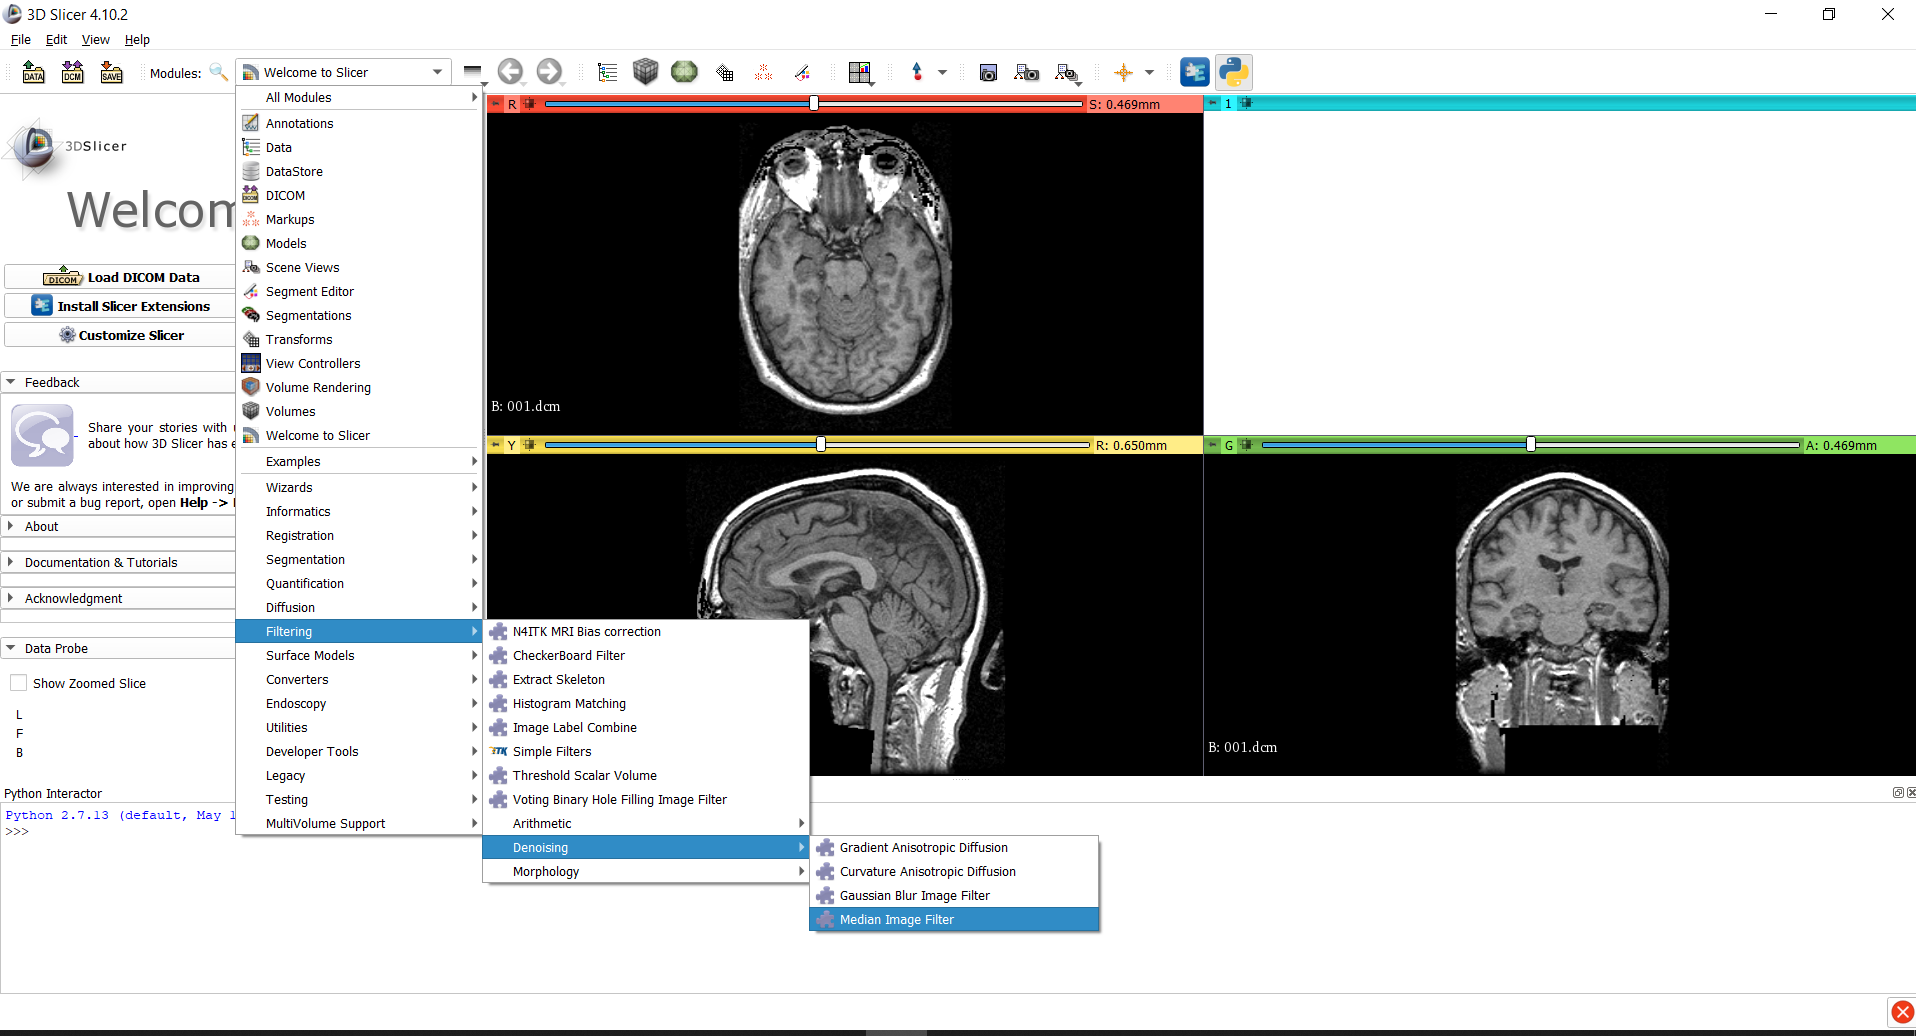

## Simple Filters

En este módulo se puede econtrar gran variedad de filtros, entre estos se pueden entontrar los siguientes
* Gradient Magnitude Image filter
* Grayscale Dilate Image Filter
* Grayscale Erode Image Filter 
* Laplacian Sharpening Image Filter

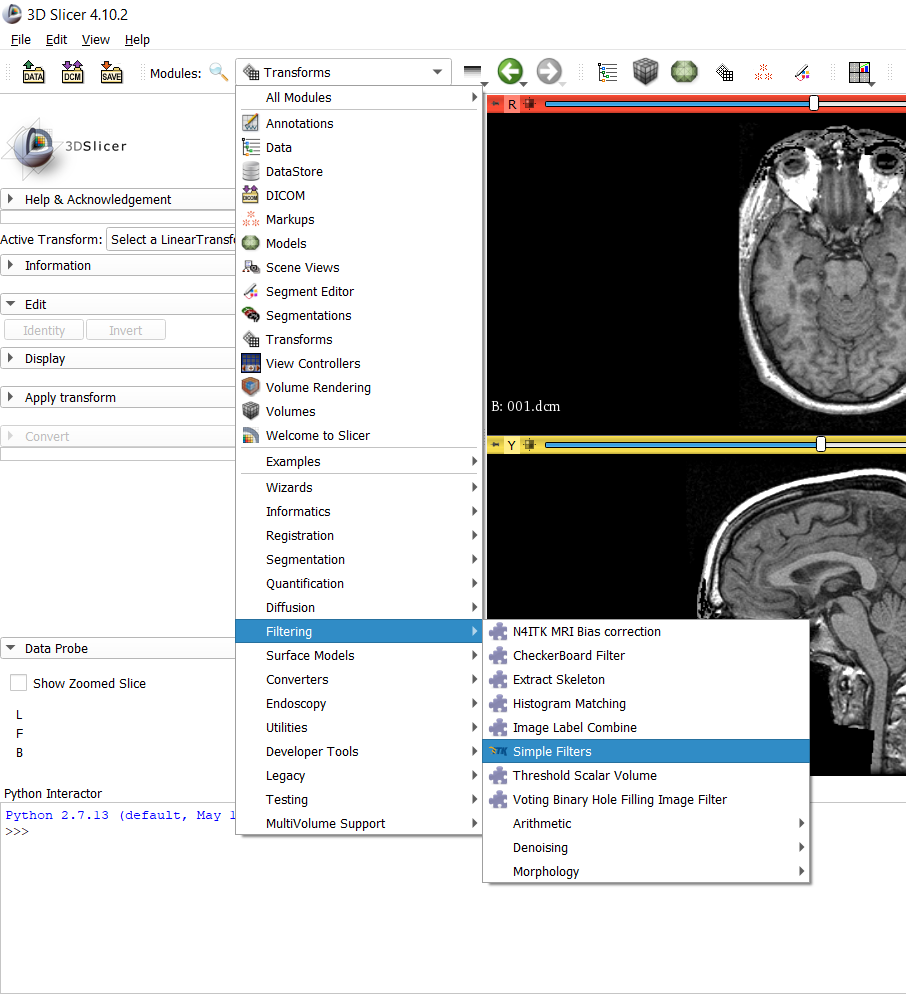 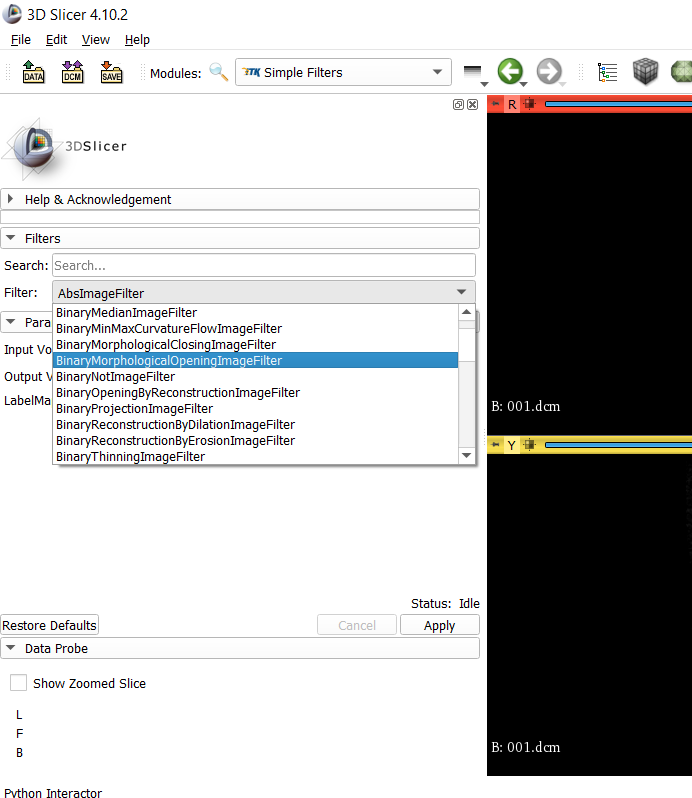


### Gradient Magnitude Image filter
Calcula la magnitud del gradiente de una región de imagen en cada píxel.

### Grayscale Dilate Image Filter
Hace que dos objetos separados queden más cerca uno del otro.
Este método utiliza un elemento de estructuración para cubrir el borde del objeto. Crece el objeto con este elemento estructurante, el elemento estructurante es un elemento estructurante vecino con un tamaño de radio definido por el usuario.

### Grayscale Erode Image Filter
Hace que dos objetos cerca queden más alejados uno del otro.
La erosión de un punto es el mínimo de los puntos en su vecindad, con esa vecindad definida por el elemento estructurante. De esta manera, es similar a muchos otros tipos de filtros de imagen como el filtro mediano y el filtro gaussiano

### Laplacian Image Filter
Crea una máscara que realza los pixeles con respecto a su vencidad a través del aumento de su nivel de grises. En general mejora el contraste y la nitidez

# Taller 

1) Aplique los filtros vistos, consecutivamente, sobre una imagen y explique cuales fueron los cambios que se evidencieron en la imagen después de aplicar cada uno

2) Aplique el filtro "Curvature Anisotropic Diffusion" (por código) y explique brevemente que le hace a la imagen y su diferencia con el "Gradient Anisotropic Diffusion"